# **Market Segmentation on mcDonalds Dataset**

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px





In [ ]:
df=pd.read_csv("G:/Internship/Feynn Labs/Group Project 1/mcdonalds.csv")          #read a file

In [ ]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [ ]:
print(pd.isnull(df).sum())             #to check null values

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [ ]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


# Data Visualization

In [ ]:
labels = ['Male','Female']
sizes = [df.query('Gender == "Male"').Gender.count(),df.query('Gender == "Female"').Gender.count()]
print(sizes)

[665, 788]


In [ ]:
#Percentage of females and males visit Mcdonalds
fig = go.Figure(data=[go.Pie(labels=labels, values=sizes, hole=.5, title='Gender wise Distribution' )])
fig.show()

In [ ]:
#distributed by no.of counts of all ages
fig1 = px.histogram(df, x="Age",color="Age",title='Age-wise costumer distribution')
fig1.update_layout(bargap=0.1)
fig1.show()

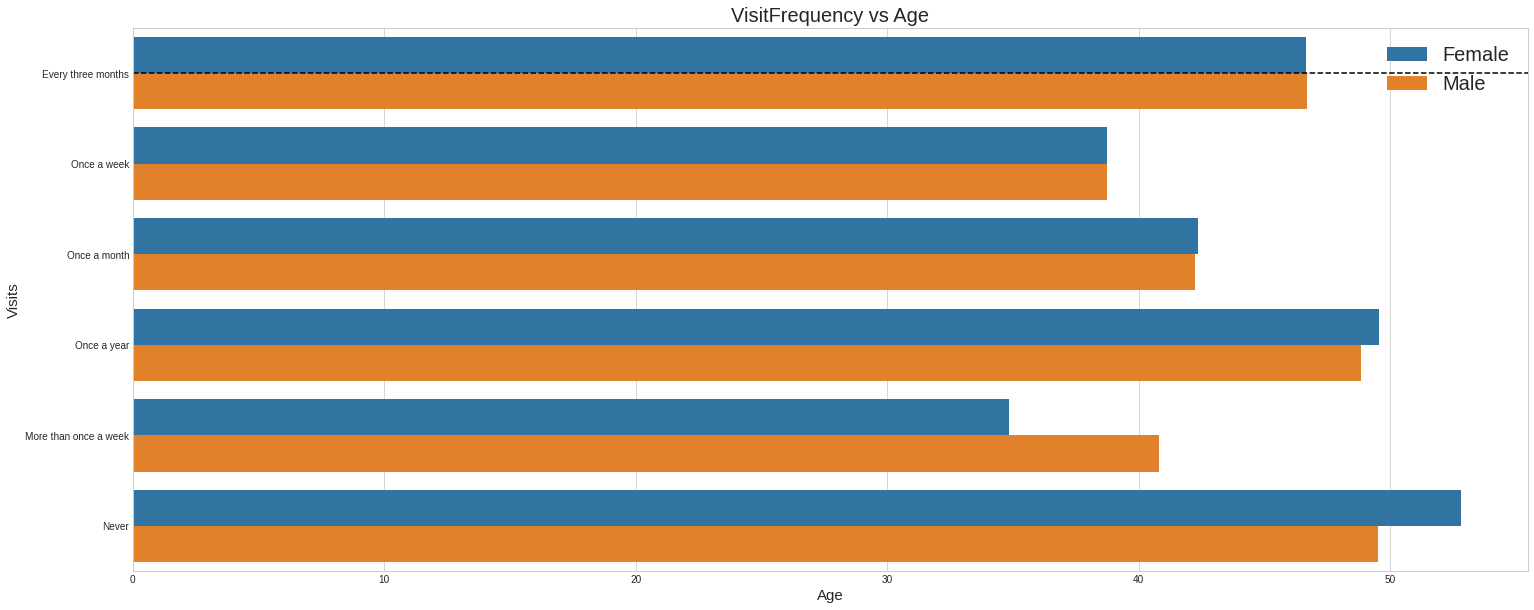

In [ ]:
plt.figure(figsize=(25,10))
plt.style.use("seaborn-whitegrid")
plt.title('VisitFrequency vs Age', fontsize=20)

ageplot = sns.barplot(
    x="Age", y="VisitFrequency", 
    hue="Gender",data=df,
    ci=None)

plt.legend(["Female", "Male"], fontsize=20)
plt.xlabel("Age", fontsize = 15)
plt.ylabel("Visits", fontsize = 15)
plt.axhline( linestyle='--', color='k')
plt.show()

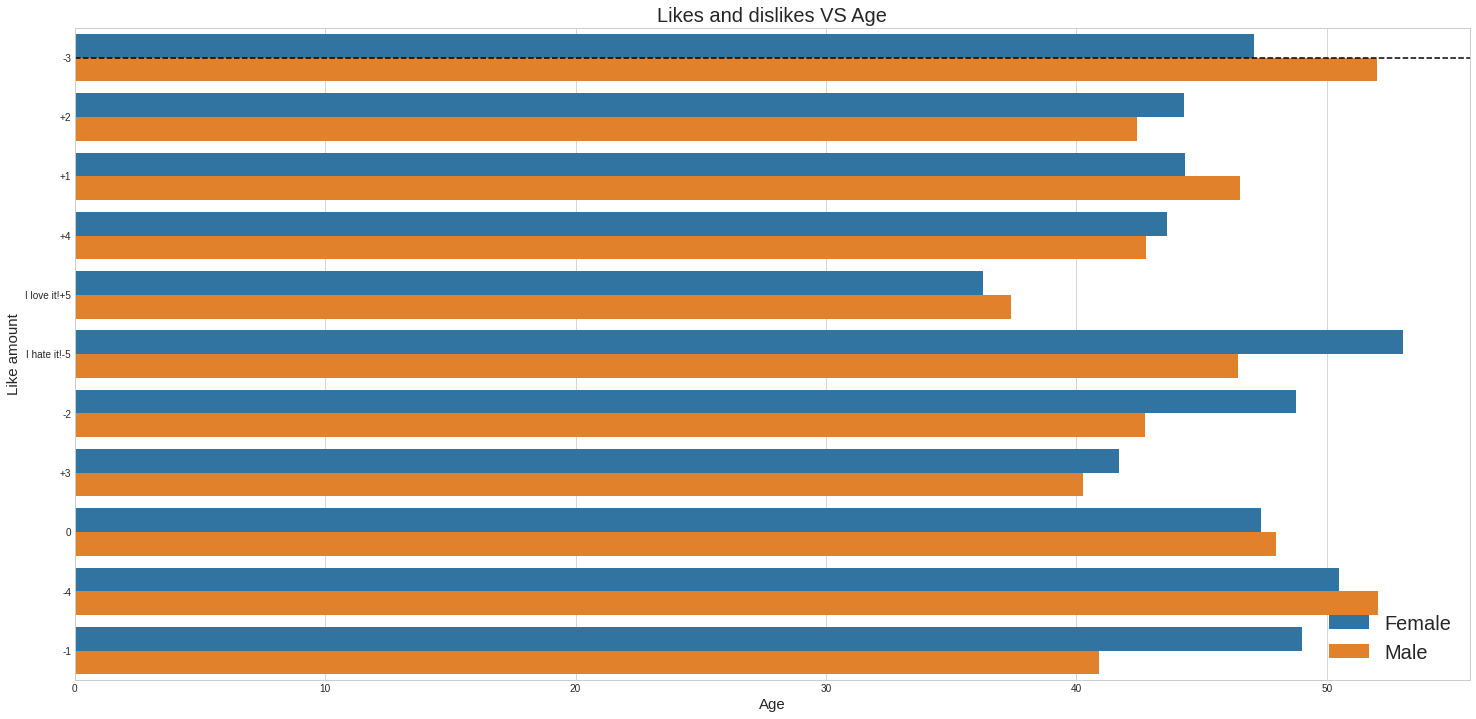

In [ ]:
plt.figure(figsize=(25,12))
plt.style.use("seaborn-whitegrid")
plt.title('Likes and dislikes VS Age', fontsize=20)
bar = sns.barplot(
    data=df, 
    y="Like", x="Age",
    hue="Gender",
    ci = None 
)
plt.legend(["Female", "Male"], fontsize=20)
plt.xlabel("Age", fontsize = 15)
plt.ylabel("Like amount", fontsize = 15)
plt.axhline( linestyle='--', color='k')
plt.show()

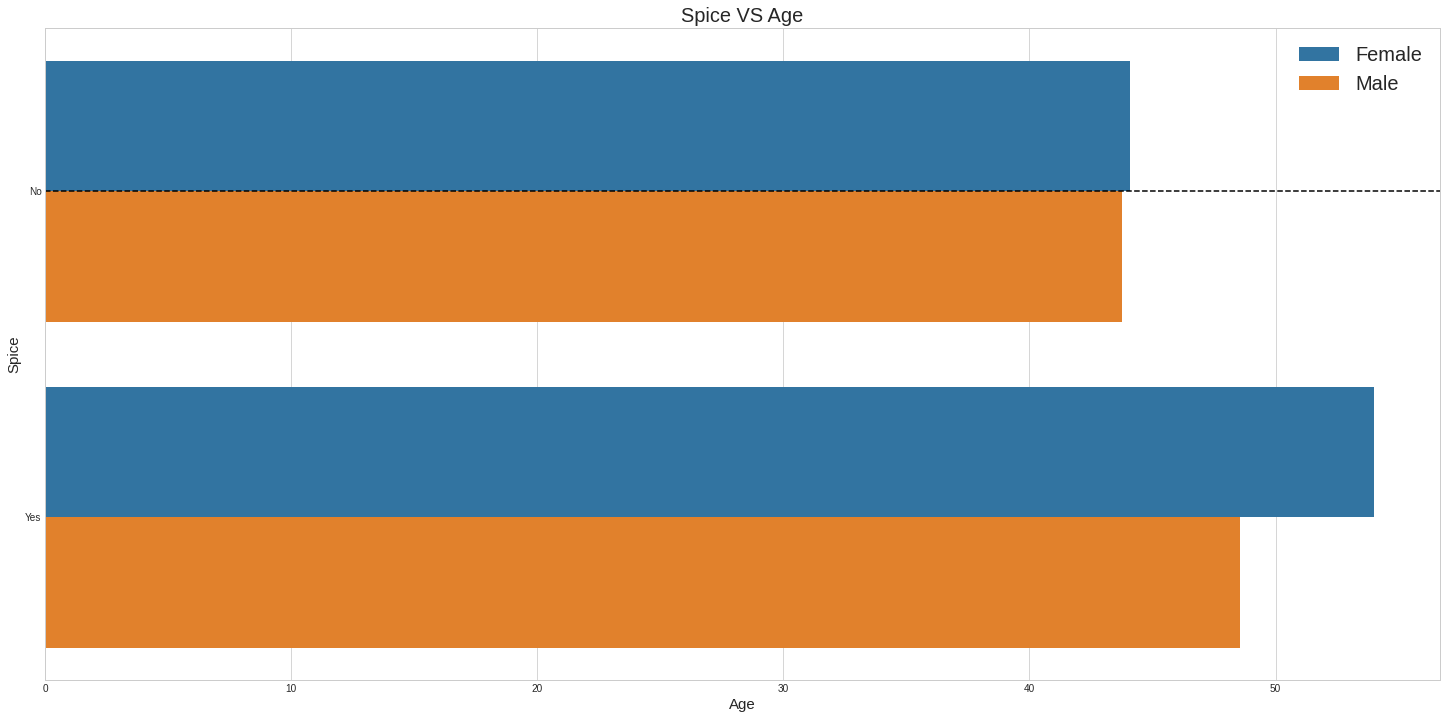

In [ ]:
plt.figure(figsize=(25,12))
plt.style.use("seaborn-whitegrid")
plt.title('Spice VS Age', fontsize=20)
bar = sns.barplot(
    data=df, 
    y="spicy", x="Age",
    hue="Gender",
    ci = None 
)

plt.legend(["Female", "Male"], fontsize=20)
plt.ylabel("Spice", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.axhline( linestyle='--', color='k')
plt.show()

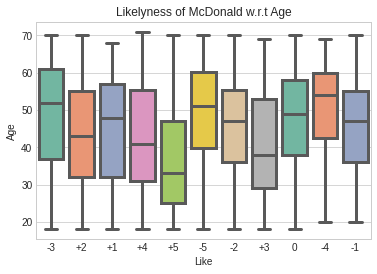

In [ ]:
df['Like']= df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
fig2 = ax = sns.boxplot(x="Like", y="Age",
                 data=df, palette="Set2",linewidth=3, orient="v")
plt.title('Likelyness of McDonald w.r.t Age')
plt.show()

# Pre-Processing

In [ ]:
df.drop(['Like','Age','VisitFrequency','Gender'],axis=1,inplace=True)

In [ ]:
df = df.replace({'No':0, 'Yes': 1})
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [ ]:
df.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 11)
df2 = pca.fit_transform(df)

In [ ]:
df2

In [ ]:
features=['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting']
x = df.loc[:, features].values

In [ ]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'])

In [ ]:
principalDf

In [ ]:
principalDf.describe().round(4)

In [ ]:
principalDf.std()

In [ ]:
sns.set(style='whitegrid')

sns.scatterplot(x='PC1',
                    y='PC2',
                    data=principalDf)

In [ ]:
from sklearn.cluster import KMeans
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df)

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()